**Kelompok 10**

Anggota Kelompok:
1. Halomoan Filipus Simarmata (Jupyter XXI)
2. Diana Eka Riyani (Jupyter XXI)
3. Nyayu Chika Marselina (Jupyter XXI)
4. Sukma Imelda (Cordoba)
5. Athiya Shinta Wulandari (Cordoba)

# **AI Project Cycle (Computer Vision)**

# **Problem Solving**

1. What? (Apa masalahnya? Apa yg dibutuhkan?) : Banyaknya masyarakat yang tidak memakai masker saat pandemi sehingga dibutuhkannya pendeteksi masker wajah untuk menghindari penyebaran kasus COVID-19 dan juga meminimalisir pelanggaran protokol kesehatan yang sudah ditetapkan oleh pemerintah.
2. Where? (Dimana / pada saat apa permasalahan ini muncul?) : Di tempat umum yang memungkinkan untuk berinteraksi dengan orang lain (di luar tempat tinggal). Masalah ini muncul pada saat era pandemi COVID-19.
3. Who? (Stakeholder yang terkait) : Masyarakat
4. Why? (Kenapa masalah ini muncul? Bagaimana solusinya?) : Pendeteksi penggunaan masker dianggap penting apalagi di masa pandemi seperti sekarang dikarenakan banyaknya masyarakat yang masih tidak mengenakan masker saat berada di luar ruangan atau saat berinteraksi dengan orang lain sehingga membuatnya bisa saja terindikasi virus COVID-19.

# **Data Acquisition**

Data diperoleh dari github (https://github.com/Soedirman-Machine-Learning/face-mask-detection) dengan data sebanyak 350 gambar yang kelompok kami olah dari data asli sebanyak 4500 data.


# **Data Exploration**

Data berupa kumpulan foto orang yang mengenakan masker dan yang tidak mengenakan masker.


# **Modelling**

Program dalam Mini Project ini menggunakan kombinasi antara algoritma CNN (Convolutional Neural Network) dan algoritma deteksi wajah.

# **Evaluation**

Dari pengolahan data yang kami lakukan seperti:
1. Extrasi gambar
2. Mengkonversi data ke dalam Numpy Array
3. Split data
4. Pelatihan Model
5. Dan lain-lain

Kami mendapat akurasi 100%, dari hasil akurasi tersebut memungkinkan dapat terjadinya overfitting tetapi dari hasil plot confusion matrix tidak ada kesalahan data. Mungkin bisa terjadi akibat data yang kami gunakan hanya sekitar -+8% dari data aslinya.

# Import Library yang dibutuhkan

In [ ]:
# import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import argparse
import os
import itertools
 
# Mengihitung waktu lamanya eksekusi tiap sel di Google Colab
!pip install ipython-autotime
 
%load_ext autotime

time: 1.42 ms (started: 2022-03-24 06:23:34 +00:00)


In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive
time: 23.4 s (started: 2022-03-24 06:23:56 +00:00)


In [ ]:
# Inisialisasi nilai Initial Learning Rate, berapa banyak Epoch pelatihan, dan Batch Size
INIT_LR = 1e-4
EPOCHS = 30
BS = 32
 
# Mengambil gambar dari dataset directory, kemudian inisialisasi data dan class gambar
print("Menginput gambar...")
imagePaths = list(paths.list_images('/content/drive/My Drive/dataset_orbit/dataset'))
data = []
labels = []
 
# Melakukan perulangan pada image paths
for imagePath in imagePaths:
 
    # Mengekstrak class label dari filename
    label = imagePath.split(os.path.sep)[-2]
    # Memuat input gambar (224x224) dan melakukan proses
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
 
    # Mengupdate data dan labels lists, berurutan
    data.append(image)
    labels.append(label)
 
# Mengkonversi data dan label ke dalam NumPy Arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)
 
# Melakukan one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print("Input gambar berhasil")

Menginput gambar...
Input gambar berhasil
time: 1min (started: 2022-03-24 06:25:33 +00:00)


In [ ]:
# Mempartisi data ke dalam pelatihan dan pengujian ( 80% : 20% )
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
 
# Membentuk training image generator untuk data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

time: 74.2 ms (started: 2022-03-24 06:27:01 +00:00)


In [ ]:
# Arsitektur jaringan VGG16Net
baseModel = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

58900480/58889256 [==============================] - 0s 0us/step
time: 3.41 s (started: 2022-03-24 06:27:23 +00:00)


In [ ]:
baseModel.trainable = False
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Membentuk bagian head dari model yang akan ditempatkan pada base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
 
# Menempatkan head model pada base model
model = Model(inputs=baseModel.input, outputs=headModel)
 
# Perulangan pada seluruh base model
for layer in baseModel.layers:
    layer.trainable = False
 
# Persiapan kompilasi model
print("Mengkompilasi model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

model.summary()

Mengkompilasi model...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Pelatihan model
print("Training head model...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

Training head model...
Epoch 1/30
8/8 [==============================] - 24s 2s/step - loss: 1.2537 - accuracy: 0.6104 - val_loss: 0.6916 - val_accuracy: 0.6620
Epoch 2/30
8/8 [==============================] - 4s 424ms/step - loss: 0.9935 - accuracy: 0.6948 - val_loss: 0.6109 - val_accuracy: 0.7324
Epoch 3/30
8/8 [==============================] - 3s 402ms/step - loss: 0.9001 - accuracy: 0.7510 - val_loss: 0.5081 - val_accuracy: 0.7887
Epoch 4/30
8/8 [==============================] - 3s 403ms/step - loss: 0.6752 - accuracy: 0.8032 - val_loss: 0.4130 - val_accuracy: 0.8169
Epoch 5/30
8/8 [==============================] - 3s 400ms/step - loss: 0.6319 - accuracy: 0.8514 - val_loss: 0.3355 - val_accuracy: 0.8451
Epoch 6/30
8/8 [==============================] - 3s 399ms/step - loss: 0.5990 - accuracy: 0.8273 - val_loss: 0.2742 - val_accuracy: 0.8592
Epoch 7/30
8/8 [==============================] - 3s 401ms/step - loss: 0.5505 - accuracy: 0.8755 - val_loss: 0.2297 - val_accuracy: 0.9014

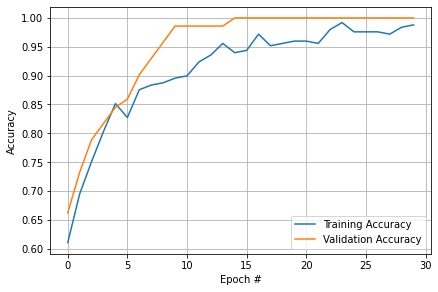

time: 607 ms (started: 2022-03-24 06:31:57 +00:00)


In [ ]:
# Grafik Akurasi
N = EPOCHS
fig = plt.figure(figsize=(7, 4))
fig.set_figheight(10)
fig.set_figwidth(15)
 
plt.subplot(2, 2, 1)
plt.plot(np.arange(0, N), H.history["accuracy"],label = "Training Accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
# plt.title("Kurva Tingkat Akurasi", size=15)
plt.grid(zorder = 0)

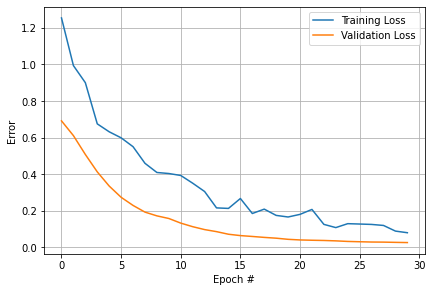

time: 297 ms (started: 2022-03-24 06:32:13 +00:00)


In [ ]:
# Grafik error
N = EPOCHS
fig = plt.figure(figsize=(7, 4))
fig.set_figheight(10)
fig.set_figwidth(15)
 
plt.subplot(2, 2, 2)
plt.plot(np.arange(0, N), H.history["loss"],label = "Training Loss")
plt.plot(np.arange(0, N), H.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Error")
# plt.title("Kurva Tingkat Error", size=15)
plt.grid(zorder = 0)
plt.show()

In [ ]:
# Memeriksa matriks model
print(model.metrics_names)
# Evaluasi data test
print(model.evaluate(x= testX, y = testY))

['loss', 'accuracy']
3/3 [==============================] - 2s 644ms/step - loss: 0.0269 - accuracy: 1.0000
[0.026896201074123383, 1.0]
time: 1.62 s (started: 2022-03-24 06:32:26 +00:00)


In [ ]:
# Menampilkan matriks yang benar dan matriks hasil prediksi
# Label yang benar
yTrue = np.argmax(testY, axis=1)

# Label prediksi
YPred = model.predict(testX, batch_size=BS)
yPred = np.argmax(YPred, axis=1)

print(yTrue)
print(yPred)

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0]
[0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0]
time: 950 ms (started: 2022-03-24 06:32:47 +00:00)


In [ ]:
def get_confusion_matrix(yTrue, yPred):
    n_classes = len(np.unique(yTrue)) 
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(yTrue, yPred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')
    

time: 3.59 ms (started: 2022-03-24 06:33:02 +00:00)


In [ ]:
conf = get_confusion_matrix(yTrue, yPred)
conf

array([[37,  0],
       [ 0, 34]])

time: 5.17 ms (started: 2022-03-24 06:33:12 +00:00)


Text(0.5, 15.0, 'Prediction Label')

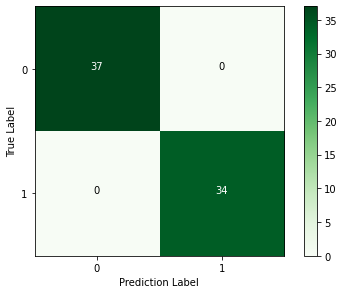

time: 461 ms (started: 2022-03-24 06:33:22 +00:00)


In [ ]:
classes = [0, 1]
# Plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
# plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Prediction Label')

In [ ]:
# Berdasarkan confusion matrix
TP = true_pos = 37
TN = true_neg = 34
FP = false_pos = 0
FN = false_neg = 0

time: 2.29 ms (started: 2022-03-24 06:33:47 +00:00)


In [ ]:
results = {}

# Akurasi
metric = "Akurasi"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} = {results[metric]: .3f}")

# Recall
metric = "Recall"
results[metric] = TP / (TP + FN)
print(f"{metric} = {results[metric]: .3f}")

# Presisi
metric = "Presisi"
results[metric] = TP / (TP + FP)
print(f"{metric} = {results[metric]: .3f}")

# Nilai F1
metric = "F1"
results[metric] = 2 / (1 / results["Presisi"] + 1 / results["Recall"])
print(f"{metric} = {results[metric]: .3f}")

Akurasi =  1.000
Recall =  1.000
Presisi =  1.000
F1 =  1.000
time: 26.4 ms (started: 2022-03-24 06:34:01 +00:00)


In [ ]:
# Membuat prediksi dari pengujian
predIdxs = model.predict(testX, batch_size=BS)
 
# Untuk setiap gambar dalam set pengujian, kita perlu menemukan indeks label
# dengan probabilitas prediksi terbesar
predIdxs = np.argmax(predIdxs, axis=1)
 
# Menampilkan laporan klasifikasi yang diformat dengan baik
print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00        37
without_mask       1.00      1.00      1.00        34

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

time: 514 ms (started: 2022-03-24 06:34:19 +00:00)


#*save model*


In [ ]:
export_dir='saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets
time: 3.92 s (started: 2022-03-24 06:34:50 +00:00)


In [ ]:
# Mengkonvert model ke format tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

time: 2.49 s (started: 2022-03-24 06:35:03 +00:00)


In [ ]:
# Menyimpan model
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

59130924

time: 52.2 ms (started: 2022-03-24 06:35:19 +00:00)


In [ ]:
# Memuat model dan mengalokasikan ke tensor
interpreter = tf.lite.Interpreter(model_content = tflite_model)
interpreter.allocate_tensors()

# Mendapatkan input dan ouput tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']

print(input_details)
print(output_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 54, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
time: 104 ms (started: 2022-03-24 06:35:34 +00:00)


#*uji coba*

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

time: 4.95 ms (started: 2022-03-24 06:36:00 +00:00)


Mendeteksi wajah...


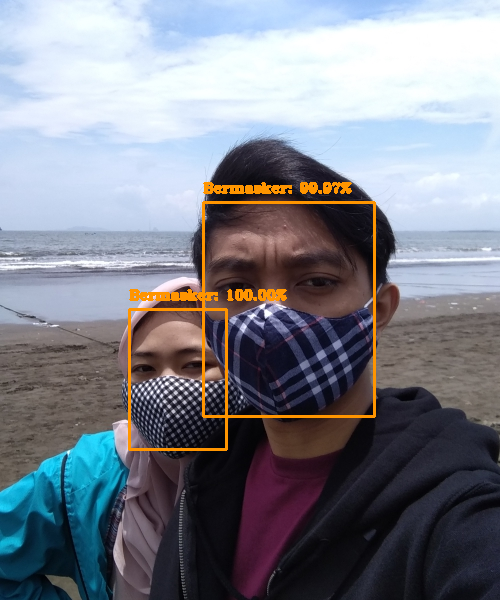

-1

time: 1.61 s (started: 2022-03-24 07:30:01 +00:00)


In [ ]:
image = cv2.imread('/content/drive/My Drive/dataset_orbit/face-detector/example_img/ex05.jpg')
orig = image.copy()
(h, w) = image.shape[:2]

blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))

net=cv2.dnn.readNet('/content/drive/My Drive/dataset_orbit/face-detector/deploy.prototxt','/content/drive/My Drive/dataset_orbit/face-detector/res10_300x300_ssd_iter_140000.caffemodel')

# Melewatkan blob melalui jaringan dan mendapatkan deteksi wajah
print("Mendeteksi wajah...")
net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
	# ekstrak keyakinan (yaitu, probabilitas) yang terkait dengan deteksi
	confidence = detections[0, 0, i, 2]

	if confidence > 0.5:
		# Menghitung koordinat (x, y) dari kotak pembatas untuk objek
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

		# Memastikan kotak pembatas berada dalam dimensi bingkai
		(startX, startY) = (max(0, startX), max(0, startY))
		(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

		# Ekstrak ROI wajah, konversikan dari BGR ke pemesanan saluran RGB,
    # dan mengubah ukurannya menjadi 224x224, dan lalu pre-proses
		face = image[startY:endY, startX:endX]
		face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
		face = cv2.resize(face, (224, 224))
		face = img_to_array(face)
		face = preprocess_input(face)
		face = np.expand_dims(face, axis=0)

		# Membaca wajah dengan model
		(mask, withoutMask) = model.predict(face)[0]

		# Menggunakan masker hijau, tidak bermasker merah
		label = "Bermasker" if mask > withoutMask else "Tidak Bermasker"
		color = (0, 149, 255) if label == "Bermasker" else (255, 0, 0)

		# Probabilitas hasil deteksi
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

		# Menampilkan hasil dengan label dan kotak
		cv2.putText(image, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_TRIPLEX, 0.45, color, 2)
		cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

# Menampilkan output
cv2_imshow(image)
cv2.waitKey(0)